In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [8]:
regression_df = pd.read_csv("cleaned_data/reg_data_clean.csv")

In [9]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         39 non-null     object 
 1   host_id            39 non-null     float64
 2   zipcode            39 non-null     float64
 3   latitude           39 non-null     float64
 4   longitude          39 non-null     float64
 5   accommodates       39 non-null     float64
 6   bathrooms          39 non-null     float64
 7   bedrooms           39 non-null     float64
 8   beds               39 non-null     float64
 9   price              39 non-null     float64
 10  guests_included    39 non-null     float64
 11  minimum_nights     39 non-null     float64
 12  maximum_nights     39 non-null     float64
 13  number_of_reviews  39 non-null     float64
 14  inventory          39 non-null     int64  
 15  total_average      39 non-null     float64
dtypes: float64(14), int64(1), ob

In [57]:
regression_df.head()

,Unnamed: 0,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
0,2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121,248302.80
1,2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615,250573.92
2,2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110,258221.84
3,2016-09-01,2.994063e+07,37200.010986,36.155576,-86.763946,5.105584,1.566677,1.883430,2.602991,196.314922,2.358560,2.063168,656141.164785,25.443699,3277,286736.04
4,2017-09-01,5.042165e+07,37200.222056,36.158658,-86.767780,5.366467,1.647787,1.956677,2.836834,209.013691,2.710240,2.117404,404179.796887,31.943173,5332,315522.64


In [59]:
regression_df.tail()

,Unnamed: 0,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
34,2020-10-01,1.089264e+08,37202.053518,36.161076,-86.769561,6.280145,1.0,2.230096,3.715725,212.630327,1.0,5.341427,677.050875,53.893459,6054,375489.12
35,2020-11-01,1.117148e+08,37202.339223,36.160839,-86.770117,6.232711,1.0,2.218913,3.693253,211.524146,1.0,5.443210,671.420326,54.235403,5943,378282.36
36,2020-12-01,1.179998e+08,37202.157698,36.160300,-86.769277,6.199805,1.0,2.214762,3.646236,212.372868,1.0,7.771094,666.111201,53.628841,6151,381649.48
37,2021-01-01,1.191308e+08,37201.978389,36.160192,-86.769101,6.204158,1.0,2.220530,3.650295,225.423215,1.0,7.493942,659.377865,54.544368,6108,384369.80
38,2021-02-01,1.220764e+08,37202.112522,36.160360,-86.768796,6.232861,1.0,2.229116,3.666178,233.083537,1.0,7.771536,654.272106,54.160397,6141,387076.52


In [33]:
y = regression_df['total_average']
X = regression_df.drop(['Unnamed: 0', 'host_id','total_average'], axis=1)

In [38]:
y = regression_df['total_average']
X = regression_df['inventory']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[6054 7436 5446 5998 5899  121 6138 6045 6962 6151 5332 5250 7578 6490
 2110 1615 7574 6089 7496 5921 5754 6855 6141 6108 5201 7372 6180].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
metrics.r2_score(y_train, y_hat_train)

0.9955324748843413

In [26]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 2375.289074097046
RMSE Test: 78385.98757304339


In [42]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_average   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     54.88
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           9.27e-08
Time:                        12:39:12   Log-Likelihood:                -305.54
No. Observations:                  27   AIC:                             615.1
Df Residuals:                      25   BIC:                             617.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+05   1.37e+04     17.585      0.000    2.12e+05    2.69e+05
inventory     16.8544      2.275      7.408      0.000      12.168      21.540
==============================================================================
Omnibus:                        5.837   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.305
Skew:                           1.075   Prob(JB):                       0.0705
Kurtosis:                       2.694   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
import statsmodels.formula.api as smf
simple_reg_model = smf.ols(formula='total_average ~ inventory', data=regression_df).fit()

In [37]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

Intercept    243935.058927
inventory        16.056183
dtype: float64


,0,1
Intercept,219720.485007,268149.632848
inventory,12.150981,19.961384


p-values: 
Intercept    9.886676e-22
inventory    5.191057e-10
dtype: float64
r-squared: 0.6522554516824053


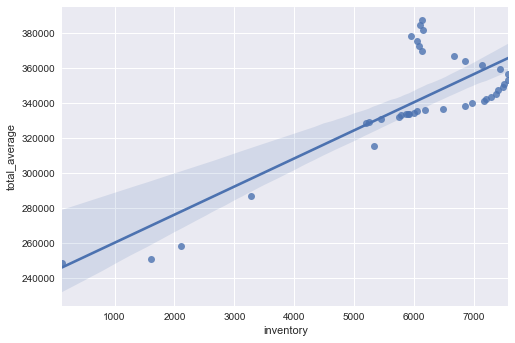

In [43]:
sns.regplot(X,y)

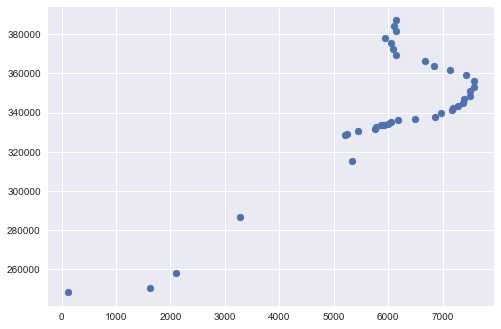

In [44]:
plt.scatter(X,y)

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-28-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds']


In [30]:
df_pairs=regression_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [31]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]


,cc
pairs,
"(total_average, host_id)",0.978789
"(number_of_reviews, accommodates)",0.975316
"(bathrooms, guests_included)",0.974515
"(total_average, accommodates)",0.970141
"(number_of_reviews, host_id)",0.955491
"(accommodates, host_id)",0.954447
"(number_of_reviews, total_average)",0.949496
"(inventory, number_of_reviews)",0.909112
"(accommodates, inventory)",0.899763


In [34]:
#X = regression_df.drop(['total_average'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('zipcode', 715259843.1212648),
 ('latitude', 5457073078.292448),
 ('longitude', 6564502079.45954),
 ('accommodates', 22771.63979053534),
 ('bathrooms', 10842.413959299245),
 ('bedrooms', 5500.522294833365),
 ('beds', 8880.791590580611),
 ('price', 985.9804349733819),
 ('guests_included', 2423.499957960968),
 ('minimum_nights', 68.88862950081703),
 ('maximum_nights', 2.143976185425021),
 ('number_of_reviews', 1559.0167982996509),
 ('inventory', 554.9645190228075)]

## total_average vs. number of reviews

In [45]:
y = regression_df['total_average']
X = regression_df['number_of_reviews']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
simple_reg_model = smf.ols(formula='total_average ~ number_of_reviews', data=regression_df).fit()

In [51]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept            206414.964047
number_of_reviews      2914.870325
dtype: float64


,0,1
Intercept,191325.628949,221504.299144
number_of_reviews,2593.997965,3235.742685


In [52]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept            2.380020e-26
number_of_reviews    3.246172e-20
dtype: float64
r-squared: 0.9015417083368342


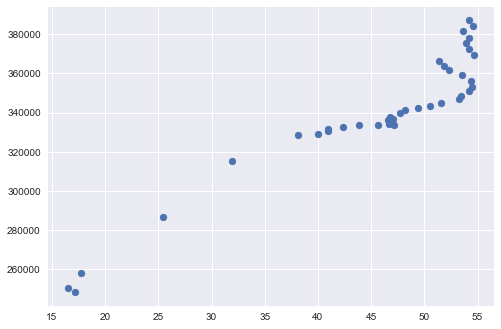

In [53]:
plt.scatter(X,y)

In [54]:
simple_reg_model = smf.ols(formula='total_average ~ accommodates', data=regression_df).fit()

In [55]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept      -56454.606231
accommodates    67922.084958
dtype: float64


,0,1
Intercept,-89575.110571,-23334.101891
accommodates,62265.675887,73578.494030


In [56]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept       1.401787e-03
accommodates    2.314294e-24
dtype: float64
r-squared: 0.9411739313529919


### Correlation Heatmap

In [65]:
np.triu(np.ones_like(regression_df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

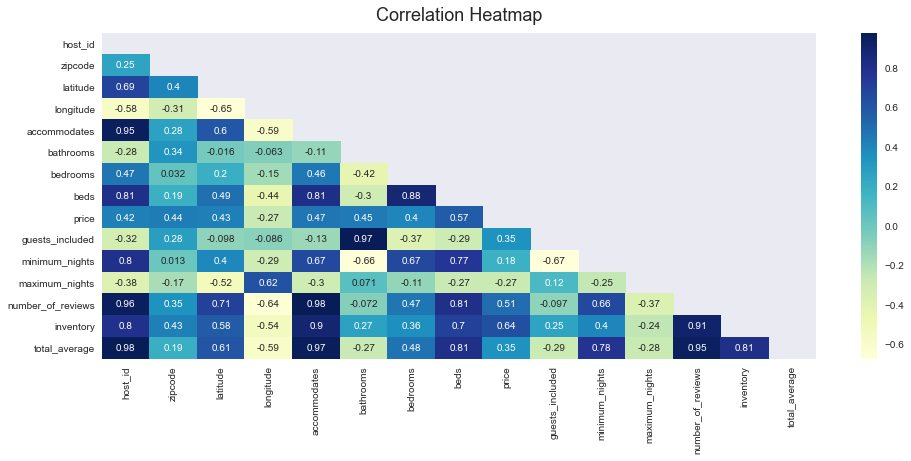

In [66]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False)

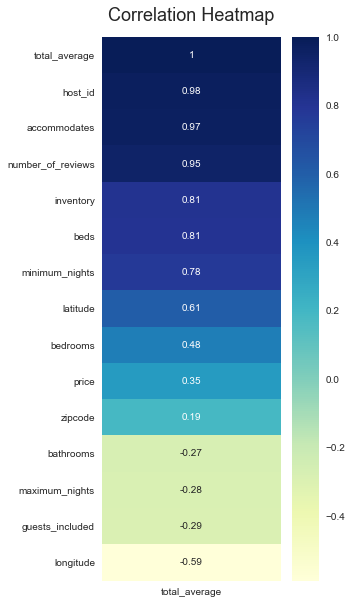

In [72]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Simple Linear Regression

#### Pairplots

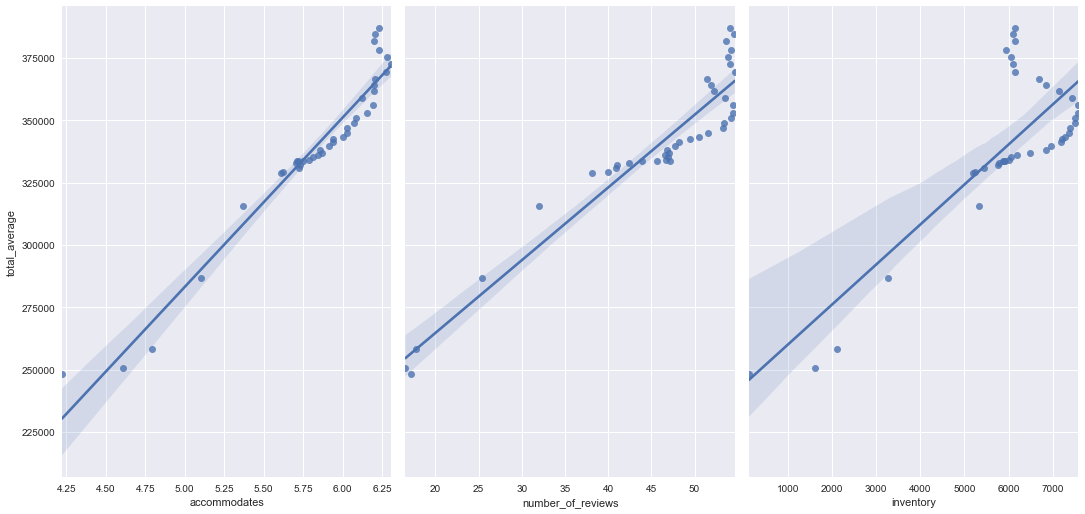

In [76]:
sns.pairplot(regression_df, x_vars=['accommodates','number_of_reviews','inventory'], 
             y_vars='total_average', height=7, aspect=0.7, kind='reg');

The relationship does not appear to be linear. There are also very limited number of datapoints under $300k.


#### Inventory

In [80]:
def run_ols_model(outcome, predictors):
    formula = outcome+'~'+predictors
    model = ols(formula=formula, data=regression_df).fit()
    return model.summary()

In [81]:
outcome = 'total_average'
predictors = 'inventory'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_average   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     69.40
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           5.19e-10
Time:                        15:30:52   Log-Likelihood:                -439.63
No. Observations:                  39   AIC:                             883.3
Df Residuals:                      37   BIC:                             886.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.439e+05    1.2e+04     20.412      0.000     2.2e+05    2.68e+05
inventory     16.0562      1.927      8.331      0.000      12.151      19.961
==============================================================================
Omnibus:                        8.834   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.824
Skew:                           1.165   Prob(JB):                       0.0121
Kurtosis:                       3.073   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Number of Reviews

In [82]:
outcome = 'total_average'
predictors = 'number_of_reviews'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_average   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     338.8
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.25e-20
Time:                        15:31:06   Log-Likelihood:                -415.02
No. Observations:                  39   AIC:                             834.0
Df Residuals:                      37   BIC:                             837.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.064e+05   7447.138     27.717      0.000    1.91e+05    2.22e+05
number_of_reviews  2914.8703    158.362     18.406      0.000    2593.998    3235.743
==============================================================================
Omnibus:                        3.564   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.689
Skew:                           0.498   Prob(JB):                        0.261
Kurtosis:                       2.186   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Accommodates

In [83]:
outcome = 'total_average'
predictors = 'accommodates'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_average   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     592.0
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.31e-24
Time:                        15:31:17   Log-Likelihood:                -404.98
No. Observations:                  39   AIC:                             814.0
Df Residuals:                      37   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.645e+04   1.63e+04     -3.454      0.001   -8.96e+04   -2.33e+04
accommodates  6.792e+04   2791.645     24.330      0.000    6.23e+04    7.36e+04
==============================================================================
Omnibus:                       11.338   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.970
Skew:                           1.232   Prob(JB):                      0.00415
Kurtosis:                       3.823   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

#### All three

In [84]:
outcome = 'total_average'
x_cols = ['number_of_reviews','accommodates', 'inventory']
predictors = '+'.join(x_cols)
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_average   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     354.4
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.06e-26
Time:                        15:32:40   Log-Likelihood:                -393.03
No. Observations:                  39   AIC:                             794.1
Df Residuals:                      35   BIC:                             800.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.144e+04   3.78e+04     -1.889      0.067   -1.48e+05    5349.092
number_of_reviews   995.7357    444.031      2.242      0.031      94.306    1897.166
accommodates       7.075e+04   9666.478      7.319      0.000    5.11e+04    9.04e+04
inventory            -7.8834      1.455     -5.418      0.000     -10.837      -4.929
==============================================================================
Omnibus:                        7.191   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.835
Skew:                           0.819   Prob(JB):                       0.0541
Kurtosis:                       3.952   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All Predictors

#### Feature Importance Graph

#### Stepwise Selection

In [ ]:
#